# Classification/Regression of Iris Dataset

## Basic plots

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (8,6)
sns.set(style='white', color_codes=True)

iris = pd.read_csv('iris.csv')

In [29]:
%config InlineBackend.figure_formats = ['svg']

In [30]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

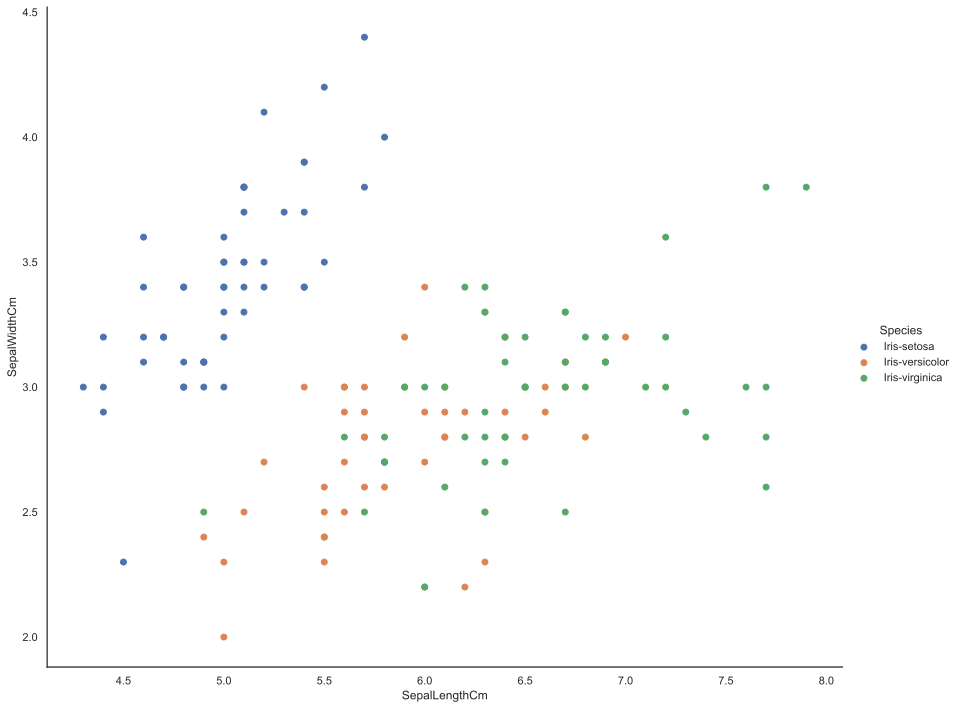

In [32]:
g = sns.FacetGrid(iris, hue='Species', height=10, aspect=1.2)
g.map_dataframe(plt.scatter, x='SepalLengthCm', y='SepalWidthCm')
g.add_legend()

sns.set(font_scale=2)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

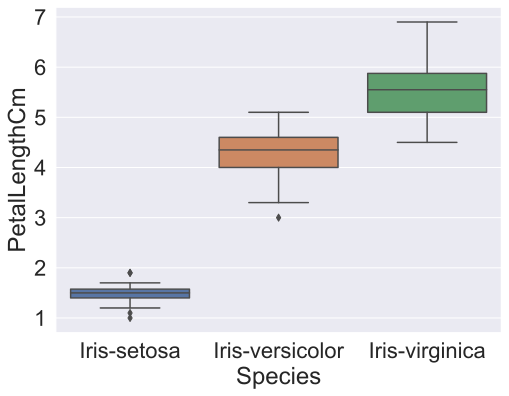

In [33]:
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)

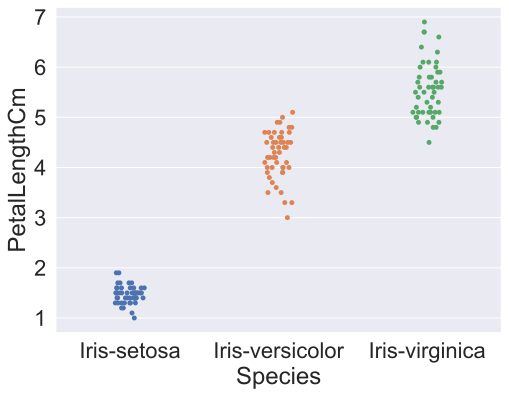

In [34]:
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

In [35]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

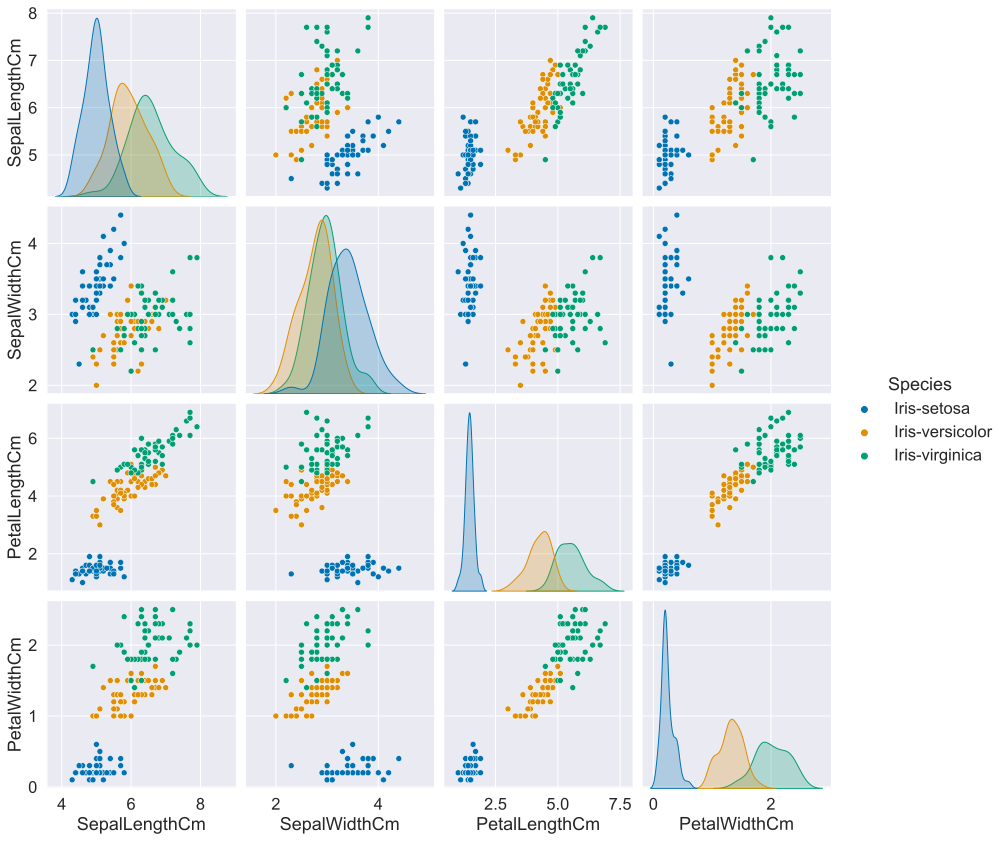

In [36]:
sns.set(font_scale=1.5)
sns.pairplot(iris.drop('Id', axis=1), hue='Species', height=3, palette='colorblind')

<AxesSubplot:>

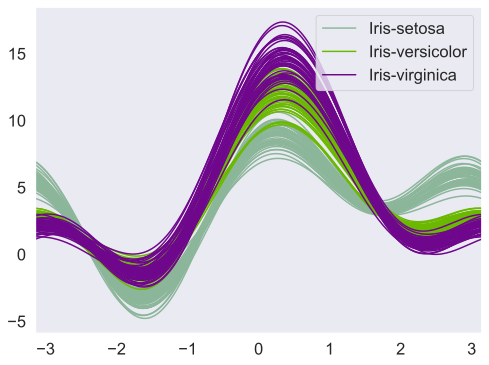

In [37]:
from pandas.plotting import andrews_curves

sns.set(font_scale=1.5)
andrews_curves(iris.drop('Id', axis=1), 'Species')

## Classification

In [38]:
from sklearn.model_selection import train_test_split        # for using cross_validation
from sklearn.tree import DecisionTreeClassifier, plot_tree  # for using decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier          # for K nearest neighbours
from sklearn import metrics                                 # for checking the model accuracy

# drop the attribute 'Id'
iris = pd.read_csv('iris.csv').drop('Id', axis=1)

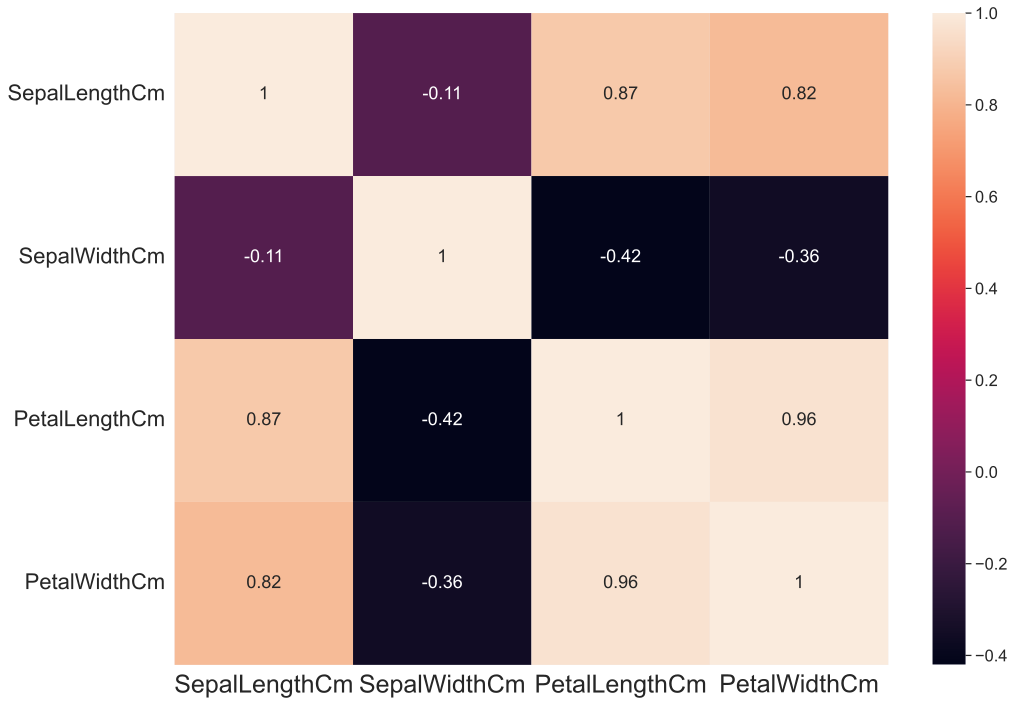

In [39]:
# check the correlation between features (attributes)
plt.figure(figsize=(16,12))
sns.heatmap(iris.corr(), annot=True)
plt.xticks(rotation=0, fontsize=25)
plt.yticks(rotation=0, fontsize=22)
plt.show()

In [40]:
# Split the train and test data for cross validation
train, test = train_test_split(iris, test_size=0.3)

# The training input data features (SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm)
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
# The training output (Species)
train_Y = train.Species
# The testing imput data
test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
# The testing output (Species)
test_Y = test.Species

test_Y.shape

(45,)

In [41]:
# Apply the decision tree algorithm
model_d = DecisionTreeClassifier(max_leaf_nodes=4)
# Train the model with training data
model_d.fit(train_X,train_Y)
# Predict the model ouput with test data
prediction_d = model_d.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction_d,test_Y))

The accuracy of the Decision Tree is 0.9111111111111111


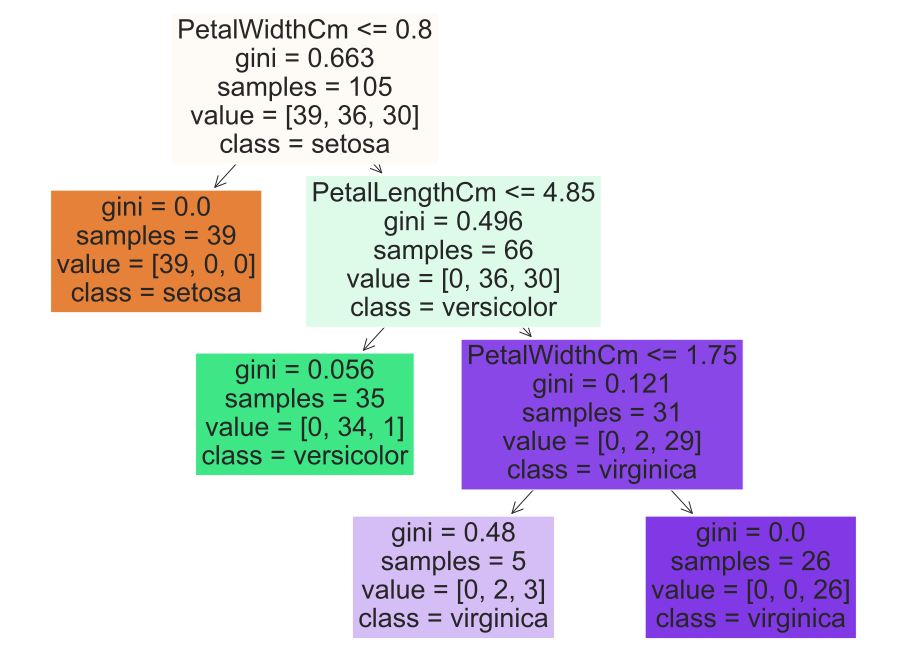

In [42]:
# Plot the decision tree

fn = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
cn = ['setosa', 'versicolor', 'virginica']

plt.figure(figsize=(16,12))
plot_tree(model_d, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [55]:
# Apply the K nearest neighbors algorithm
model_k = KNeighborsClassifier(n_neighbors=5)
# Train the model with training data
model_k.fit(train_X,train_Y)
# Predict the model ouput with test data
prediction_k = model_k.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction_k,test_Y))

The accuracy of the KNN is 0.9555555555555556


In [56]:
from sklearn.metrics import classification_report

print(classification_report(test_Y, prediction_k))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.95      0.95      0.95        20

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



### Stratified K-Fold cross validation

In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from numpy import mean, std

# Split the training set and tesing set
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = iris.Species

print(X.shape)

# 10 stratified cross validation splits
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
# Decision tree algorithm
model_dk = DecisionTreeClassifier(max_leaf_nodes=4)

scores_dk = cross_val_predict(model_dk, X, Y, cv=skf)
cm = confusion_matrix(Y, scores_dk)

# print('The mean accuracy of Decision Tree algorithm is %.3f, the std is %.3f' % (mean(scores_dk), std(scores_dk)))
print(cm)

(150, 4)
[[50  0  0]
 [ 0 46  4]
 [ 0  3 47]]


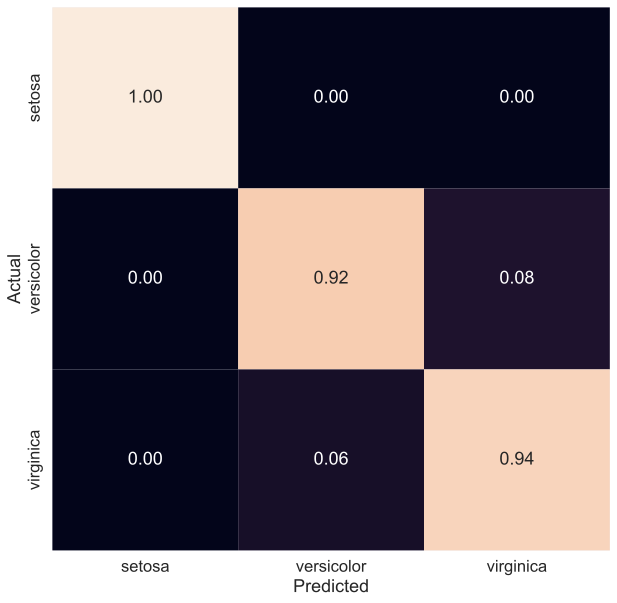

In [66]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['setosa', 'versicolor', 'virginica'], \
    yticklabels=['setosa', 'versicolor', 'virginica'], cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

fig.savefig('confusion_matrix.pdf', bbox_inches='tight')

In [67]:
model_kk = KNeighborsClassifier(n_neighbors=10)
scores_kk = cross_val_predict(model_kk, X, Y, cv=skf)
cm_k = confusion_matrix(Y, scores_kk)
# print('The mean accuracy of K-nearest neighbors algorithm is %.3f, the std is %.3f' % (mean(scores_kk), std(scores_kk)))

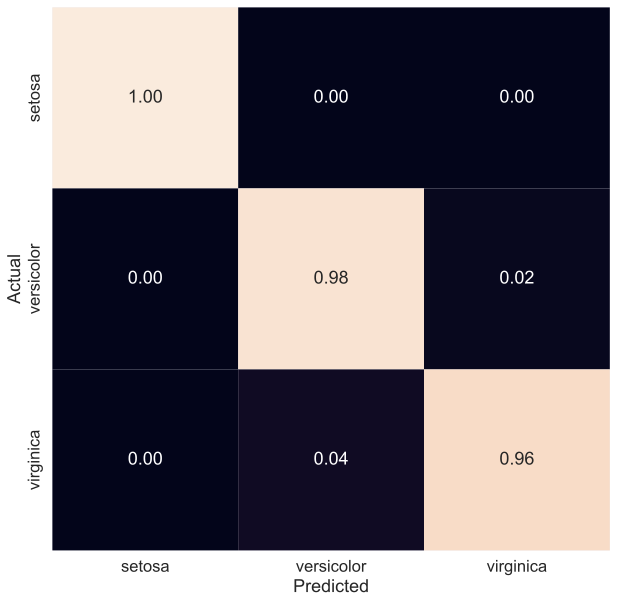

In [68]:
cmn_k = cm_k.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn_k, annot=True, fmt='.2f', xticklabels=['setosa', 'versicolor', 'virginica'], \
    yticklabels=['setosa', 'versicolor', 'virginica'], cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

fig.savefig('confusion_matrix_k.pdf', bbox_inches='tight')

### Seperate classification: Petal, Sepal

In [47]:
# Now use Petals and Sepals Seperately
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

petal_x = petal[['PetalLengthCm', 'PetalWidthCm']]
petal_y = petal.Species

sepal_x = sepal[['SepalLengthCm','SepalWidthCm']]
sepal_y = sepal.Species

In [48]:
# 10 stratified cross validation splits
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
model_kk = KNeighborsClassifier(n_neighbors=5)

scores_pkk = cross_val_score(model_kk, petal_x, petal_y, cv=skf)
scores_skk = cross_val_score(model_kk, sepal_x, sepal_y, cv=skf)

print('The mean accuracy of Petal classification is %.3f, the std is %.3f' % (mean(scores_pkk), std(scores_pkk)))
print('\n')
print('The mean accuracy of Sepal classification is %.3f, the std is %.3f' % (mean(scores_skk), std(scores_skk)))


The mean accuracy of Petal classification is 0.960, the std is 0.044


The mean accuracy of Sepal classification is 0.760, the std is 0.140


### some experiments

C:\Users\wangk\AppData\Local\Temp/ipykernel_32888/1165764679.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()


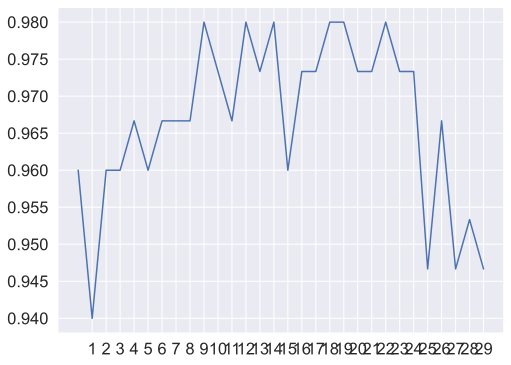

In [49]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = iris.Species

a_index=range(30)
a=pd.Series()
x = np.arange(1, 30)
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

for i in a_index:
    model=KNeighborsClassifier(n_neighbors=i+1) 
    # model.fit(train_X,train_Y)
    # prediction=model.predict(test_X)
    # a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
    scores = cross_val_score(model, X, Y, cv=skf)
    a = a.append(pd.Series(mean(scores)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()

### Use GridSearchCV to find the best hyperparameters

In [50]:
from sklearn.model_selection import GridSearchCV

params_d = {'max_leaf_nodes': list(range(2, 20)), 'min_samples_split': [2, 3, 4]}
params_k = {'n_neighbors': list(range(1, 20))}

grid_search_cv_d = GridSearchCV(DecisionTreeClassifier(), params_d, verbose=1, cv=skf)
grid_search_cv_k = GridSearchCV(KNeighborsClassifier(), params_k, verbose=1, cv=skf)

grid_search_cv_d.fit(X, Y)
grid_search_cv_k.fit(X, Y)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 19 candidates, totalling 190 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             verbose=1)

In [51]:
print(grid_search_cv_d.best_estimator_)
grid_search_cv_k.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=4)


KNeighborsClassifier(n_neighbors=10)

[Text(178.56, 285.39000000000004, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(89.28, 203.85000000000002, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(267.84000000000003, 203.85000000000002, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(178.56, 122.31, 'PetalLengthCm <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(89.28, 40.76999999999998, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(267.84000000000003, 40.76999999999998, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(357.12, 122.31, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

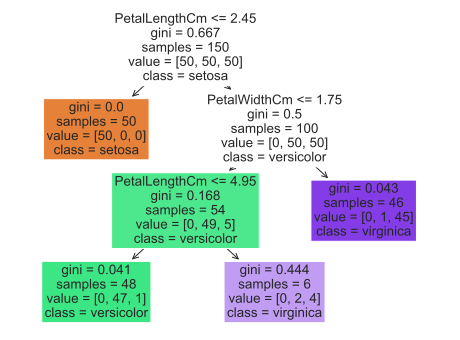

In [52]:
plot_tree(grid_search_cv_d.best_estimator_, feature_names=fn, class_names=cn, filled=True)